In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import matthews_corrcoef
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier



from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df=pd.read_csv(r'C:\Users\Lenovo\Pictures\train_data.csv')
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [8]:
df.shape

(25192, 42)

In [9]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
df.duplicated().sum()

0

In [11]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [12]:
df.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [13]:
df['protocol_type'].value_counts()

protocol_type
tcp     20526
udp      3011
icmp     1655
Name: count, dtype: int64

In [14]:
df['protocol_type'].replace({'tcp':1,'udp':2,'icmp':3},inplace=True)

In [15]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,1,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,1,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,1,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,1,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [16]:
df['service'].value_counts()

service
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: count, Length: 66, dtype: int64

In [17]:
df['service']

0        ftp_data
1           other
2         private
3            http
4            http
           ...   
25187        exec
25188    ftp_data
25189     private
25190        nnsp
25191      finger
Name: service, Length: 25192, dtype: object

In [18]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,1,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,1,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,1,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,1,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [4]:
def label_encode_dataframe(df, target_column):
    label_encoder = LabelEncoder()
    for col in df.columns:
        if col != target_column and df[col].dtype == 'object':
            df[col] = label_encoder.fit_transform(df[col])
    return df

target_column = 'class'
df_encoded = label_encode_dataframe(df, target_column)

In [5]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,16,2,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,1,19,9,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,1,46,1,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,1,38,5,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [9]:
df.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,25192.000000,25192.000000,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,1.053827,29.039139,6.982455,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,0.426998,15.555601,2.679322,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,19.000000,5.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,22.000000,9.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,46.000000,9.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,2.000000,65.000000,10.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df1=df.drop(columns=[ 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells','num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login',  'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 
        'dst_host_serror_rate','dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'])
df1

,duration,protocol_type,service,flag,src_bytes,dst_bytes,count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,class
0,0,1,19,9,491,0,2,25,0.17,0.03,normal
1,0,2,41,9,146,0,13,1,0.00,0.60,normal
2,0,1,46,5,0,0,123,26,0.10,0.05,anomaly
3,0,1,22,9,232,8153,5,255,1.00,0.00,normal
4,0,1,22,9,199,420,30,255,1.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,16,2,0,0,100,7,0.03,0.06,anomaly
25188,0,1,19,9,334,0,1,39,1.00,0.00,anomaly
25189,0,1,46,1,0,0,105,13,0.05,0.07,anomaly
25190,0,1,38,5,0,0,129,20,0.08,0.06,anomaly


In [11]:
df1['duration'].value_counts()

duration
0        23168
1          374
2          165
3          102
4           75
         ...  
17025        1
12892        1
584          1
10774        1
322          1
Name: count, Length: 758, dtype: int64

<Axes: xlabel='duration', ylabel='Density'>

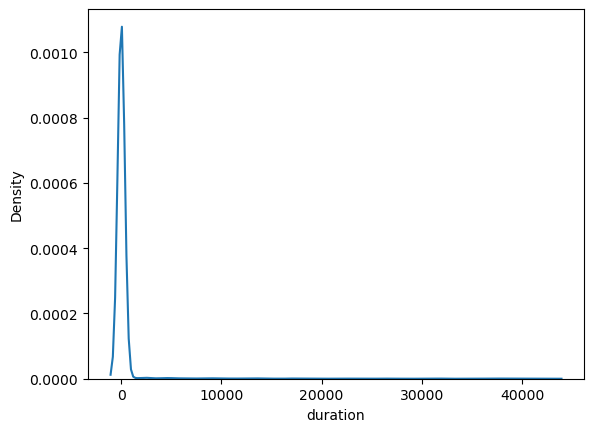

In [12]:
sns.kdeplot(x=df['duration'])

<Axes: >

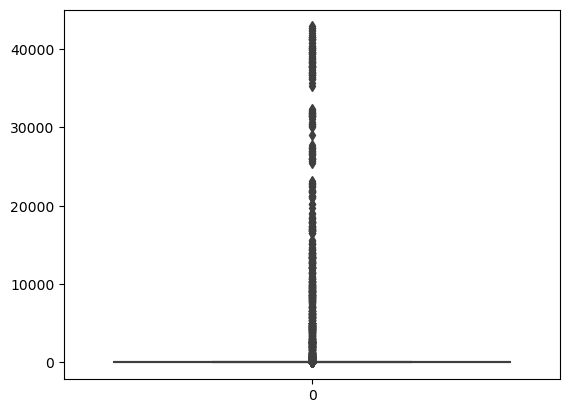

In [26]:
sns.boxplot(df1['duration'])

In [27]:
df1['duration'] = np.where(df1['duration'] > 0 , df1['duration'].median(), df1['duration'])

<Axes: ylabel='count'>

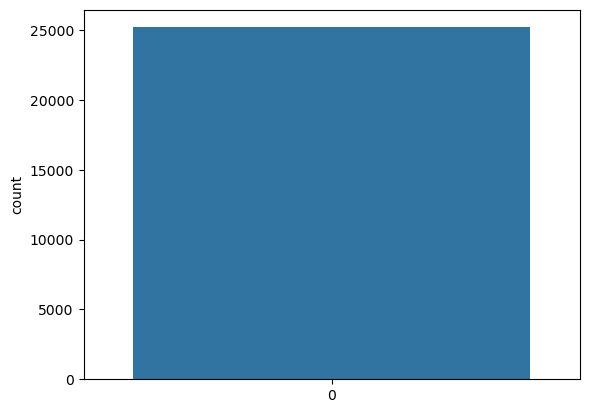

In [29]:
sns.countplot(df1['duration'])

<Axes: ylabel='proportion'>

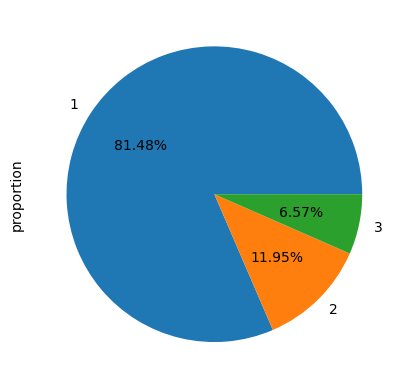

In [261]:
df1['protocol_type'].value_counts(normalize=True).plot(kind='pie',autopct="%0.2f%%")

<Axes: xlabel='protocol_type', ylabel='count'>

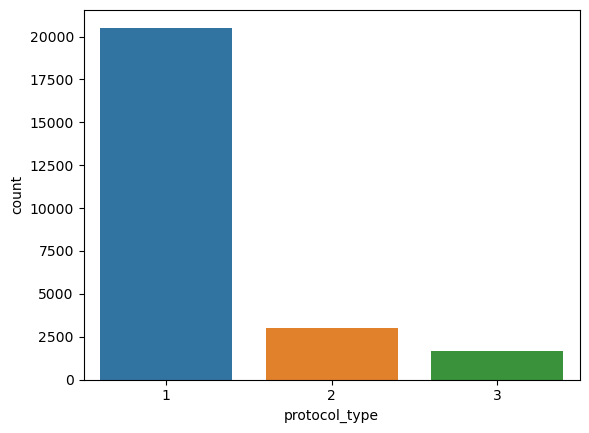

In [30]:
sns.countplot(x=df['protocol_type'])

<Axes: >

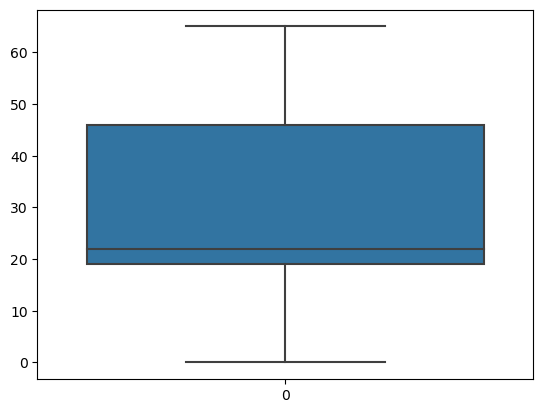

In [57]:
sns.boxplot(df1['service'])

<Axes: >

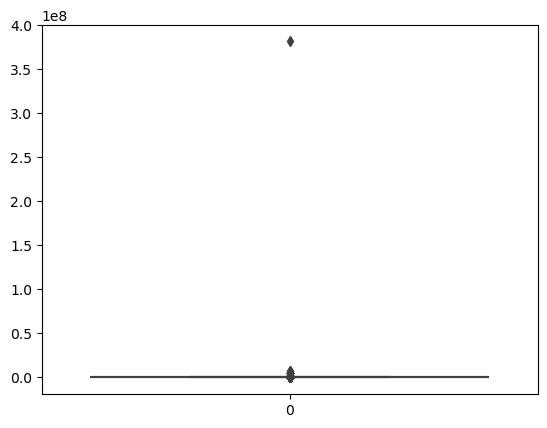

In [58]:
sns.boxplot(df1['src_bytes'])

In [59]:
df1['src_bytes'] = np.where(df1['src_bytes'] <=0.5 , df1['src_bytes'].mean(), df1['src_bytes'])


<Axes: xlabel='src_bytes', ylabel='Density'>

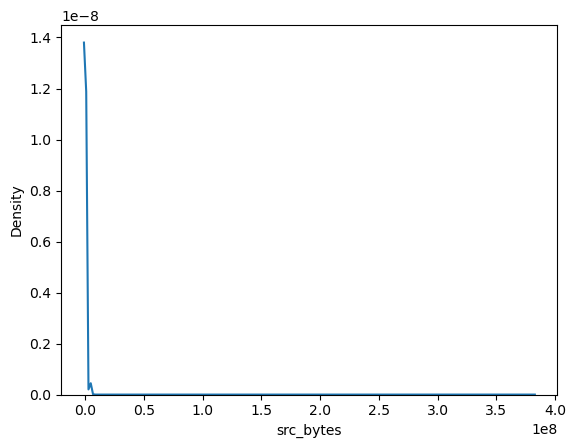

In [23]:
sns.kdeplot(df1['src_bytes'])

<Axes: >

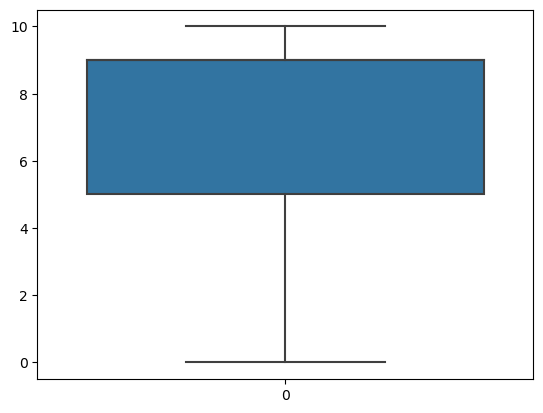

In [60]:
sns.boxplot(df1['flag'])

<Axes: ylabel='count'>

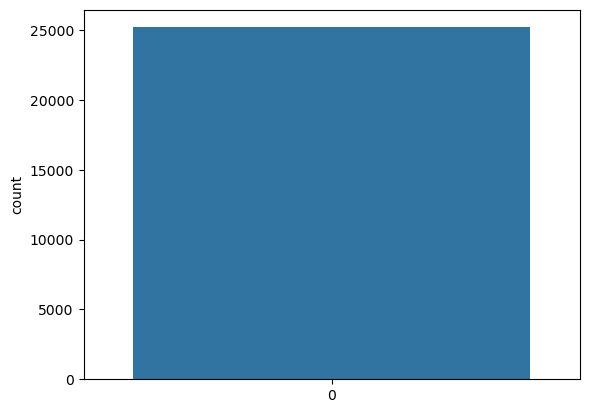

In [21]:
sns.countplot(df['flag'])

<Axes: >

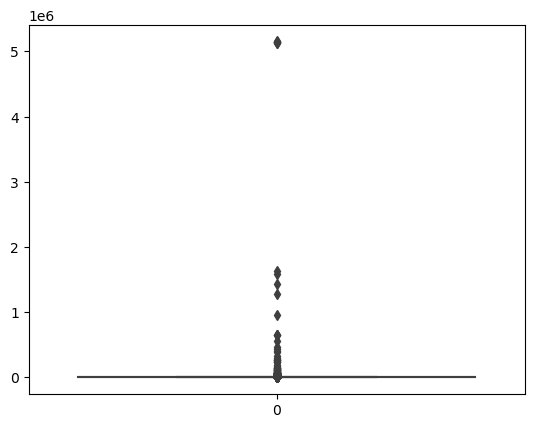

In [70]:
sns.boxplot(df['dst_bytes'])

In [76]:
df['dst_bytes'] = np.where(df['dst_bytes']<2   , df['dst_bytes'].mean(), df['dst_bytes'])

<Axes: >

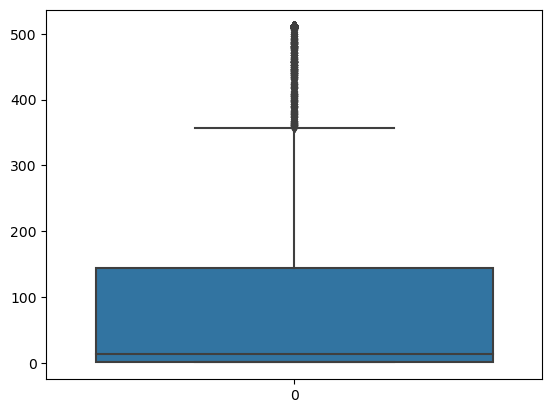

In [272]:
sns.boxplot(df1['count'])

In [273]:
df1['count'] = np.where(df1['count'] >=300, df1['count'].mean(), df1['count'])

<Axes: >

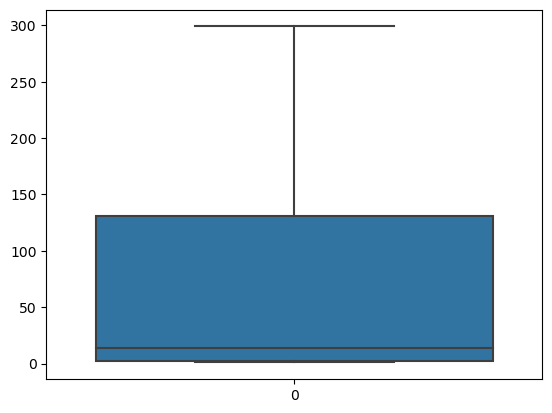

In [274]:
sns.boxplot(df1['count'])

<Axes: >

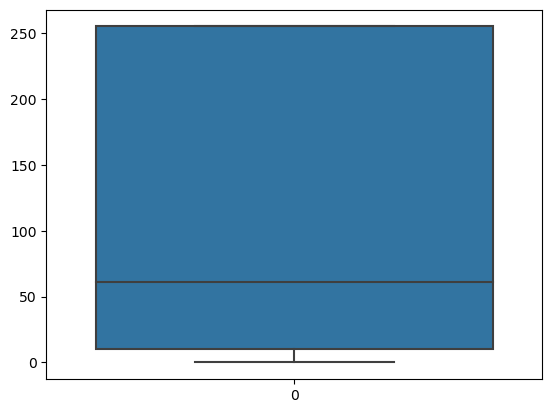

In [255]:
sns.boxplot(df1['dst_host_srv_count'])

<Axes: >

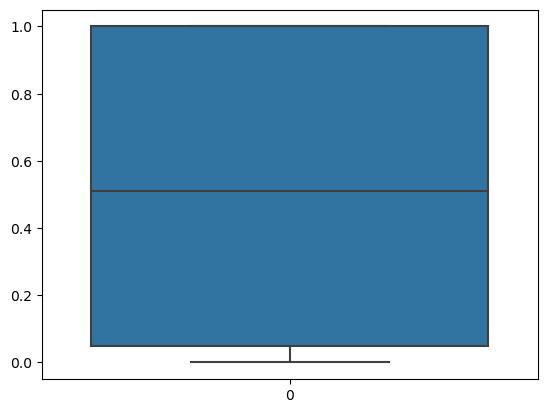

In [253]:
sns.boxplot(df1['dst_host_same_srv_rate'])

<Axes: >

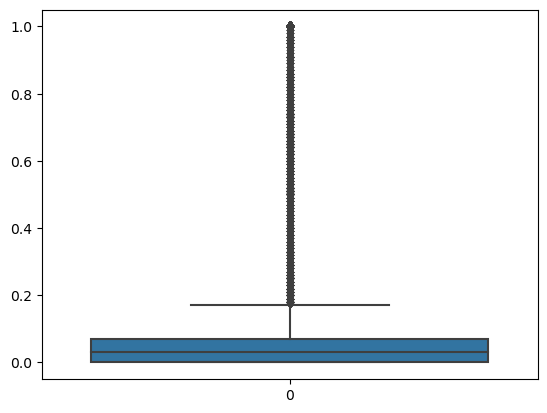

In [250]:
sns.boxplot(df1['dst_host_diff_srv_rate'])

In [251]:
df1['dst_host_diff_srv_rate'] = np.where(df['dst_host_diff_srv_rate'] >=0.15, df['dst_host_diff_srv_rate'].median(), df['dst_host_diff_srv_rate'])

<Axes: >

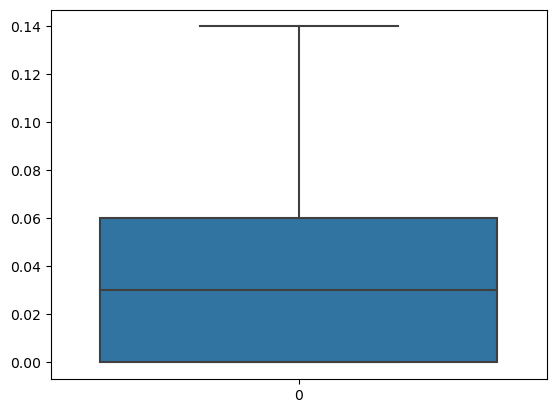

In [252]:
sns.boxplot(df1['dst_host_diff_srv_rate'])

In [10]:
df1['class'].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

<Axes: ylabel='proportion'>

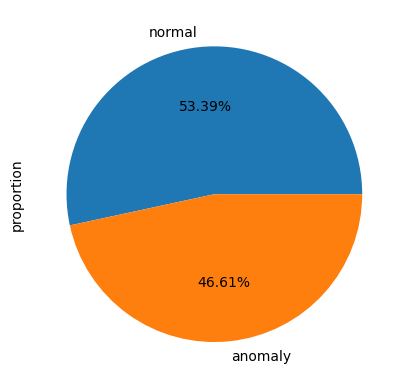

In [11]:
df1['class'].value_counts(normalize=True).plot(kind='pie',autopct="%0.2f%%")

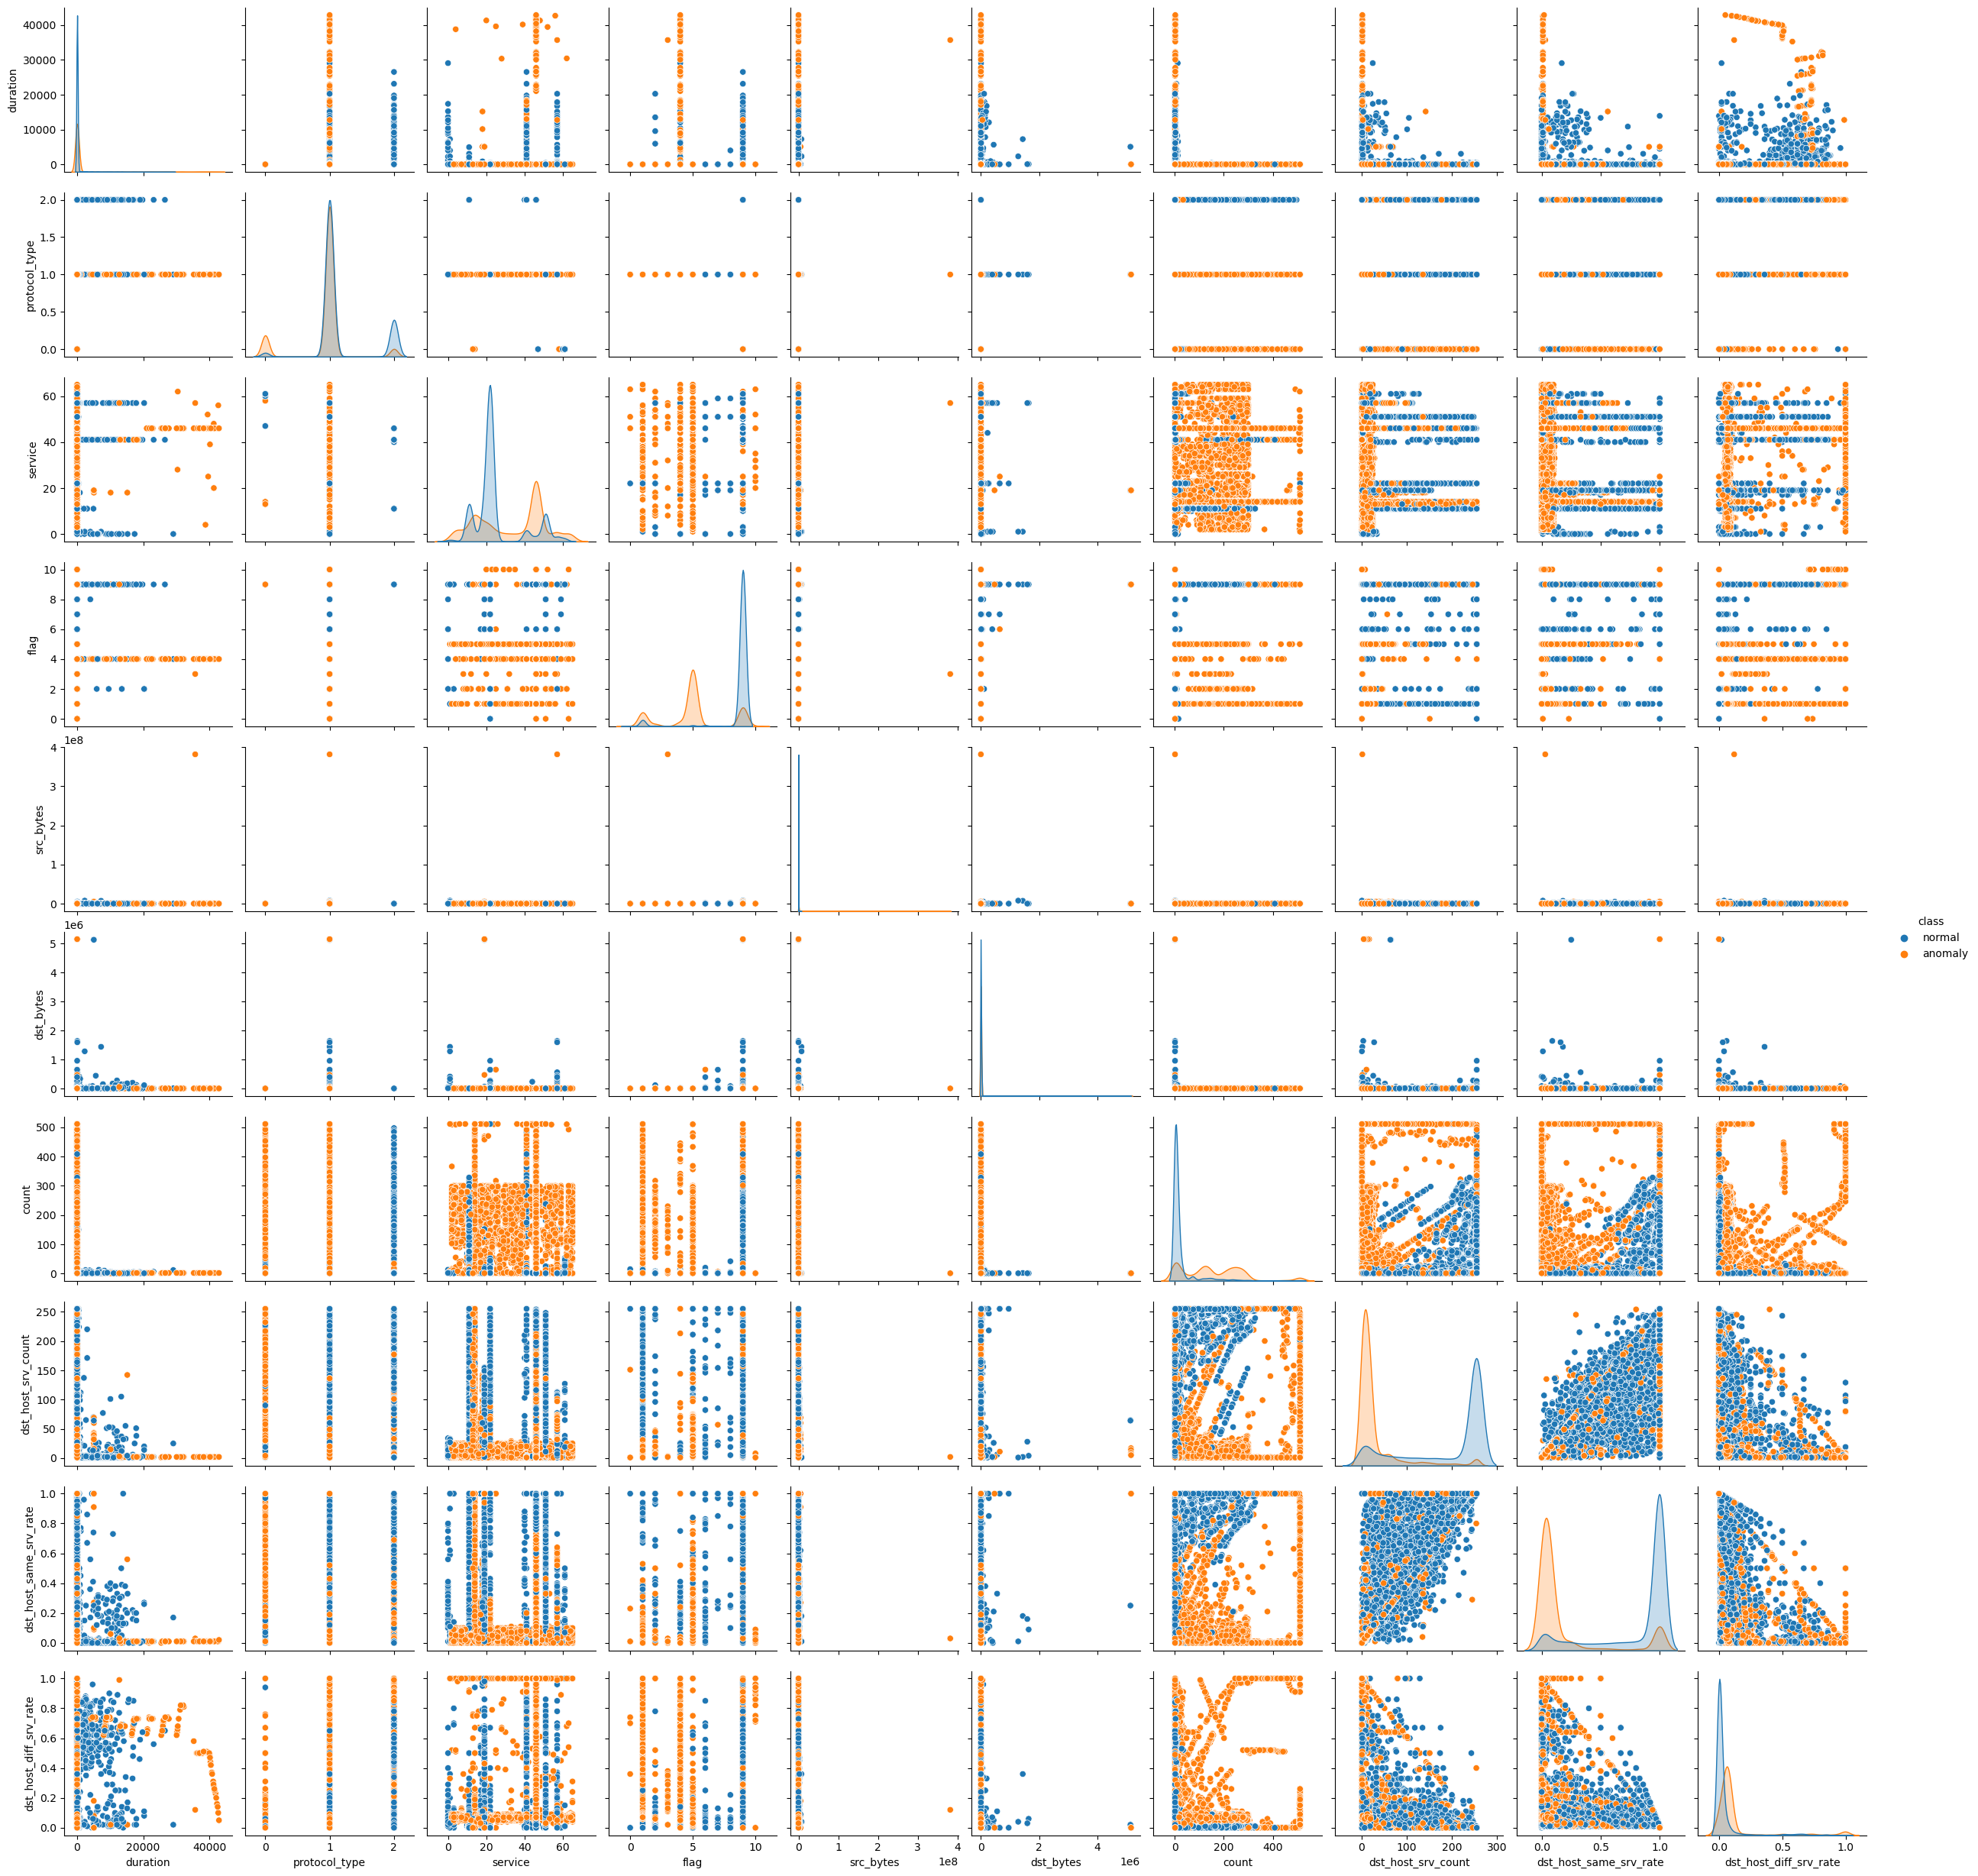

In [13]:
sns.pairplot(df1,hue='class')

In [209]:
df1.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate
count,25192.000000,25192.000000,25192.000000,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,1.250913,29.039139,6.982455,2.433063e+04,3.491847e+03,84.591180,115.063036,0.519791,0.082539
std,2686.555640,0.565119,15.555601,2.679322,2.410805e+06,8.883072e+04,114.673451,110.646850,0.448944,0.187191
min,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,19.000000,5.000000,0.000000e+00,0.000000e+00,2.000000,10.000000,0.050000,0.000000
50%,0.000000,1.000000,22.000000,9.000000,4.400000e+01,0.000000e+00,14.000000,61.000000,0.510000,0.030000
75%,0.000000,1.000000,46.000000,9.000000,2.790000e+02,5.302500e+02,144.000000,255.000000,1.000000,0.070000
max,42862.000000,3.000000,65.000000,10.000000,3.817091e+08,5.151385e+06,511.000000,255.000000,1.000000,1.000000


In [210]:
df1.corr(numeric_only=True)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate
duration,1.000000,-0.012083,0.101301,-0.066634,0.084864,0.013258,-0.081787,-0.112530,-0.119321,0.263489
protocol_type,-0.012083,1.000000,-0.246389,0.334348,-0.004442,-0.017287,0.070024,0.067524,0.206310,-0.016446
service,0.101301,-0.246389,1.000000,-0.295491,0.008554,-0.013782,0.087957,-0.409442,-0.450546,0.280962
flag,-0.066634,0.334348,-0.295491,1.000000,-0.006599,0.027606,-0.473533,0.584087,0.634415,-0.284016
src_bytes,0.084864,-0.004442,0.008554,-0.006599,1.000000,0.003611,-0.007302,-0.008520,-0.006776,0.001026
dst_bytes,0.013258,-0.017287,-0.013782,0.027606,0.003611,1.000000,-0.027824,-0.000980,0.022392,-0.012971
count,-0.081787,0.070024,0.087957,-0.473533,-0.007302,-0.027824,1.000000,-0.399974,-0.477335,0.162274
dst_host_srv_count,-0.112530,0.067524,-0.409442,0.584087,-0.008520,-0.000980,-0.399974,1.000000,0.895512,-0.389749
dst_host_same_srv_rate,-0.119321,0.206310,-0.450546,0.634415,-0.006776,0.022392,-0.477335,0.895512,1.000000,-0.417101
dst_host_diff_srv_rate,0.263489,-0.016446,0.280962,-0.284016,0.001026,-0.012971,0.162274,-0.389749,-0.417101,1.000000


In [277]:
x= df1.drop('class', axis=1)
y = df1['class']

In [278]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

In [279]:
dt_clf = DecisionTreeClassifier(random_state=10)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

In [280]:
def evaluation(string, model, ind_var, act):
    print(string.center(50, '*'))
    pred = model.predict(ind_var)

    cnf_matrix = confusion_matrix(act, pred)
    print('Confusion Matrix : \n', cnf_matrix)

    mat_coef = matthews_corrcoef(act, pred)
    print('Matthews Correlation Coefficient:', mat_coef)

    clf_report = classification_report(act,pred)
    print('Classification Report :\n', clf_report)

    return cnf_matrix

In [281]:
evaluation('Test Data Evaluation', dt_clf, x_test, y_test)

***************Test Data Evaluation***************
Confusion Matrix : 
 [[2373   16]
 [   7 2643]]
Matthews Correlation Coefficient: 0.9908513074680178
Classification Report :
               precision    recall  f1-score   support

     anomaly       1.00      0.99      1.00      2389
      normal       0.99      1.00      1.00      2650

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



array([[2373,   16],
       [   7, 2643]], dtype=int64)

In [ ]:
#logistic regression

In [282]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [283]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
print("Logistic Regression train accurcy:",lr.score(x_test,y_test))

Logistic Regression train accurcy: 0.8618773566183766


In [289]:
x = df1.drop('class',axis=1)
y = df1['class']

x_train, x_test, y_train, y_test  = train_test_split(x, y ,test_size=0.2, random_state=11, stratify=y)

In [290]:
adb_clf = AdaBoostClassifier(learning_rate=0.5,random_state=20)
adb_clf.fit(x_train, y_train) 

AdaBoostClassifier(learning_rate=0.5, random_state=20)

In [291]:
def evaluation(string, model, ind_var, act):
    print(string.center(50, '*'))
    pred = model.predict(ind_var)

    cnf_matrix = confusion_matrix(act, pred)
    print('Confusion Matrix : \n', cnf_matrix)

    mat_coef = matthews_corrcoef(act, pred)
    print('Matthews Correlation Coefficient:', mat_coef)

    clf_report = classification_report(act,pred)
    print('Classification Report :\n', clf_report)

In [292]:
evaluation('Train Data Evaluation', adb_clf, x_train, y_train)

**************Train Data Evaluation***************
Confusion Matrix : 
 [[ 9091   303]
 [  187 10572]]
Matthews Correlation Coefficient: 0.9511733044380971
Classification Report :
               precision    recall  f1-score   support

     anomaly       0.98      0.97      0.97      9394
      normal       0.97      0.98      0.98     10759

    accuracy                           0.98     20153
   macro avg       0.98      0.98      0.98     20153
weighted avg       0.98      0.98      0.98     20153



In [293]:
evaluation('Test Data Evaluation', adb_clf, x_test, y_test)

***************Test Data Evaluation***************
Confusion Matrix : 
 [[2271   78]
 [  67 2623]]
Matthews Correlation Coefficient: 0.9421760319294797
Classification Report :
               precision    recall  f1-score   support

     anomaly       0.97      0.97      0.97      2349
      normal       0.97      0.98      0.97      2690

    accuracy                           0.97      5039
   macro avg       0.97      0.97      0.97      5039
weighted avg       0.97      0.97      0.97      5039



In [ ]:
#decision tree model

In [303]:
dt_clf = DecisionTreeClassifier(random_state=10)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

In [304]:
def evaluation(string, model, ind_var, act):
    print(string.center(50, '*'))
    pred = model.predict(ind_var)

    cnf_matrix = confusion_matrix(act, pred)
    print('Confusion Matrix : \n', cnf_matrix)

    mat_coef = matthews_corrcoef(act, pred)
    print('Matthews Correlation Coefficient:', mat_coef)

    clf_report = classification_report(act,pred)
    print('Classification Report :\n', clf_report)

    return cnf_matrix

In [305]:
train_cnf = evaluation('Train Data Evaluation', dt_clf, x_train, y_train)

**************Train Data Evaluation***************
Confusion Matrix : 
 [[ 9394     0]
 [    1 10758]]
Matthews Correlation Coefficient: 0.9999003074589583
Classification Report :
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      9394
      normal       1.00      1.00      1.00     10759

    accuracy                           1.00     20153
   macro avg       1.00      1.00      1.00     20153
weighted avg       1.00      1.00      1.00     20153



In [306]:
evaluation('Test Data Evaluation', dt_clf, x_test, y_test)

***************Test Data Evaluation***************
Confusion Matrix : 
 [[2339   10]
 [  10 2680]]
Matthews Correlation Coefficient: 0.9920253971871286
Classification Report :
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      2349
      normal       1.00      1.00      1.00      2690

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



array([[2339,   10],
       [  10, 2680]], dtype=int64)